In [219]:
# 기본기능
import pymysql 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from random import randint


# 모델추가
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier


# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization


# 글꼴
matplotlib.rcParams['font.family'] = 'MalgunGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 경로 설정 (본인 환경에 맞게 경로를 수정해주세요)
font_path = 'C:\Windows\Fonts\malgun.ttf'

# 폰트 이름 얻기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# 한글 폰트 설정
rc('font', family=font_name)

### 데이터호출

In [332]:

# credit
query = 'SELECT * from Data_Mart.credit_analysis_model_a_kor;' 
raw_crawl = pd.read_sql(query, cnx) 

cnx.close()

c:\Users\USER_20211027\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [333]:
raw_crawl.rename(columns={'순위': 'Rank'}, inplace=True)

In [334]:
raw_data = raw_crawl.copy()
data_without_rank =raw_crawl.copy()

분석용 원본테이블

In [223]:
raw_data.columns = [i.title().strip() for i in list(raw_data.columns)]

row = raw_data.shape[0]
col = raw_data.shape[1]
print("ALL DATA : The number of rows within the dataset are {} and the number of columns is {}".format(row,col))

ALL DATA : The number of rows within the dataset are 3097 and the number of columns is 57


In [224]:
raw_data.isnull().sum().sort_values(ascending=False).head()

Rank           2257
Corp              0
생산자 물가지수 연간       0
운전자본              0
유동부채비율            0
dtype: int64

신용등급이 없는 데이터 제거된 테이블

In [335]:
data_with_rank = raw_data.dropna()

In [238]:
data_with_rank.columns = [i.title().strip() for i in list(data_with_rank.columns)]
data_with_rank.reset_index(drop=True, inplace=True)

row = data_with_rank.shape[0]
col = data_with_rank.shape[1]
print("DATA_WITH_RANK : The number of rows within the dataset are {} and the number of columns is {}".format(row,col))

DATA_WITH_RANK : The number of rows within the dataset are 840 and the number of columns is 57


null값 확인

In [227]:
data_with_rank.isnull().sum().sort_values(ascending=False).head()

Corp        0
총자산 레버리지    0
운전자본        0
유동부채비율      0
당좌자산        0
dtype: int64

# Feature Enginerring

## target 값(신용등급) 분포 확인 - data_with_rank

In [228]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

c:\Users\USER_20211027\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


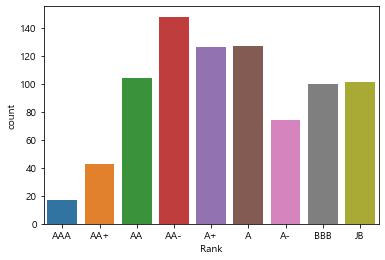

In [229]:
# 신용등급 순서대로 정렬된 리스트
credit_order = ['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB', 'JB']

# 랜덤한 색상 선택
# colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
value = randint(0, len(colors) - 1)


# 'Total_Rank' 값에 따라 시각화
sns.countplot('Rank', data=data_with_rank,  order=credit_order)

# 결과 출력
plt.show()

C:\Users\USER_20211027\AppData\Local\Temp\ipykernel_15516\1212122356.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_rank['Rank'] = pd.Categorical(data_with_rank['Rank'], categories=credit_order, ordered=True)


<AxesSubplot:xlabel='Year', ylabel='count'>

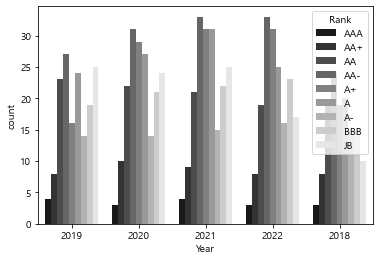

In [230]:
import random

# value 값 랜덤 생성
value = random.randint(0, len(colors)-1)

# 데이터 프레임에서 Year와 Rank의 빈도수 출력
# print(data_with_rank[['Year', 'Rank']].value_counts())

# 'Rank' 순서 변경
data_with_rank['Rank'] = pd.Categorical(data_with_rank['Rank'], categories=credit_order, ordered=True)

# 'Year'에 따른 'Rank'의 그래프 시각화
sns.countplot(x='Year', hue='Rank', data=data_with_rank, palette=colors[value])


In [231]:
# 'Year'와 'Rank'의 빈도수 계산
rank_counts = data_with_rank.groupby(['Year', 'Rank']).size().reset_index(name='Count')

# 'Year'별 'Rank'의 총 개수 계산
year_totals = rank_counts.groupby('Year')['Count'].sum().reset_index(name='Total')

# 'Rank'의 비율 계산
rank_counts = rank_counts.merge(year_totals, on='Year')
rank_counts['Ratio'] = rank_counts['Count'] / rank_counts['Total']

# 'Year'별 'Rank' 비율 분포를 데이터프레임으로 생성
rank_ratio_df = rank_counts.pivot(index='Rank', columns='Year', values='Ratio')
rank_ratio_df = rank_ratio_df.reindex(credit_order)

# 표로 출력
print(rank_ratio_df)

Year      2018     2019      2020      2021      2022
Rank                                                 
AAA   0.022556  0.02500  0.016575  0.020942  0.017143
AA+   0.060150  0.05000  0.055249  0.047120  0.045714
AA    0.142857  0.14375  0.121547  0.109948  0.108571
AA-   0.180451  0.16875  0.171271  0.172775  0.188571
A+    0.142857  0.10000  0.160221  0.162304  0.177143
A     0.150376  0.15000  0.149171  0.162304  0.142857
A-    0.112782  0.08750  0.077348  0.078534  0.091429
BBB   0.112782  0.11875  0.116022  0.115183  0.131429
JB    0.075188  0.15625  0.132597  0.130890  0.097143


In [232]:
import pandas as pd

# 'Rank'가 'JB'인 데이터 추출
jb_rank = rank_counts[rank_counts['Rank'] == 'JB']

# 'Rank'가 'JB'가 아닌 데이터 추출
other_ranks = rank_counts[rank_counts['Rank'] != 'JB']

# 'Rank'가 'JB'인 데이터와 그 외 데이터를 연도별로 그룹화하여 비율 계산
jb_ratio = jb_rank.groupby('Year')['Ratio'].sum().reset_index(name='JB_Ratio')
other_ratio = other_ranks.groupby('Year')['Ratio'].sum().reset_index(name='Other_Ratio')

# 'JB_Ratio'와 'Other_Ratio'를 연도를 기준으로 병합
ratio_diff = jb_ratio.merge(other_ratio, on='Year')

# 비율 차이 계산
ratio_diff['Ratio_Difference'] = ratio_diff['JB_Ratio'] - ratio_diff['Other_Ratio']

# 결과 출력
print(ratio_diff)


   Year  JB_Ratio  Other_Ratio  Ratio_Difference
0  2018  0.075188     0.924812         -0.849624
1  2019  0.156250     0.843750         -0.687500
2  2020  0.132597     0.867403         -0.734807
3  2021  0.130890     0.869110         -0.738220
4  2022  0.097143     0.902857         -0.805714


19년부터 직전년도 대비 2배가까이 JB비율이 증가, 20, 21년까지 기조 유지, 22년에는 18년 수준보다 약간 높은 수치로 복귀

### 신용등급은 등급간 우열이 존재하는 값이므로 상관관계 분석등을 위해 숫자형으로 변환
<br> AAA -> 9, jB 1점

In [336]:
credit_order = ['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB', 'JB']
rank_mapping = {rank: value for value, rank in enumerate(credit_order[::-1], 1)}

data_with_rank['Rank_Value'] = data_with_rank['Rank'].map(rank_mapping)

C:\Users\USER_20211027\AppData\Local\Temp\ipykernel_15516\2070122810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_rank['Rank_Value'] = data_with_rank['Rank'].map(rank_mapping)


In [341]:
data_with_rank.columns

Index(['corp', 'stock_code', 'sector', 'year', 'EBITDA 마진', '이자비용 대비 EBITDA',
       '부채비율', '순차입금 의존도', 'EBITDA 대비 순차입금', '수익', '상품비용', '판매 일반 및 관리비',
       '영업이익', '영업이익 마진', '매출액 대비 EBITDA', '총자산', '총자산이익률', 'EBITDA', '금융비용',
       '법인세', '영업현금흐름', '자유현금흐름', '총부채', '총자본', '총차입금', '순차입금', '차입 의존도',
       'EBITDA 대비 총차입금', '순수입 대비 부채비율', '총자산 레버리지', '유동부채', '운전자본', '유동부채비율',
       '당좌자산', '당좌비율', '현금 및 현금성자산', '단기차입금', '미수금 회수일수', '매출회전율 대비 평균 미수금',
       '시가총액', '최저임금', '미국/한국 환율 평균', '생산자 물가지수 연간', '한미 이자율 차이', '한국 표준 수익률',
       'Rank', '개수', '평가', '복지 지급', '일과 생활의 균형', '문화', '기회', '매니저', '추천',
       'CEO', '잠재력', 'CRB 지수 평균', 'Rank_Value'],
      dtype='object')

## 신용등급과 상관관계가 높은 피쳐 확인

문자열이 아닌 컬럼(int, float)만 추출

In [282]:
import pandas as pd

numeric_features = data_with_rank.dtypes[data_with_rank.dtypes != 'object'].index
numeric_features2 = [i for i in numeric_features if i != "Rank" and i != "Id" and i !="index"]

corr_values = data_with_rank[numeric_features2].corrwith(data_with_rank["Rank_Value"])

# 양의 상관계수 상위 5개 피처 추출
positive_corr_features = corr_values.nlargest(5)
positive_corr_values = corr_values[positive_corr_features.index]

# 음의 상관계수 상위 5개 피처 추출
negative_corr_features = corr_values.nsmallest(5)
negative_corr_values = corr_values[negative_corr_features.index]

positive_corr_df = pd.DataFrame({'Feature': positive_corr_features.index, 'Correlation': positive_corr_values})
positive_corr_df.reset_index(drop=True, inplace=True) 
negative_corr_df = pd.DataFrame({'Feature': negative_corr_features.index, 'Correlation': negative_corr_values})
negative_corr_df.reset_index(drop=True, inplace=True) 

In [283]:
positive_corr = data_with_rank[numeric_features2].corrwith(data_with_rank["Rank_Value"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = data_with_rank[numeric_features2].corrwith(data_with_rank["Rank_Value"]).sort_values()[:6].index.tolist()

positive_corr = data_with_rank[positive_corr + ["Rank_Value"]].copy()
negative_corr = data_with_rank[negative_corr + ["Rank_Value"]].copy()

### 양의 상관관계가 높은 피쳐들

In [177]:
print("양의 상관계수 상위 5개:")
print(positive_corr_df)

양의 상관계수 상위 5개:
  Feature  Correlation
0     총자본     0.474330
1      수익     0.463615
2      평가     0.442628
3      개수     0.425397
4    상품비용     0.413435


### 각 신용등급과 주요피쳐들과의 상관관계 그래프

<AxesSubplot:>

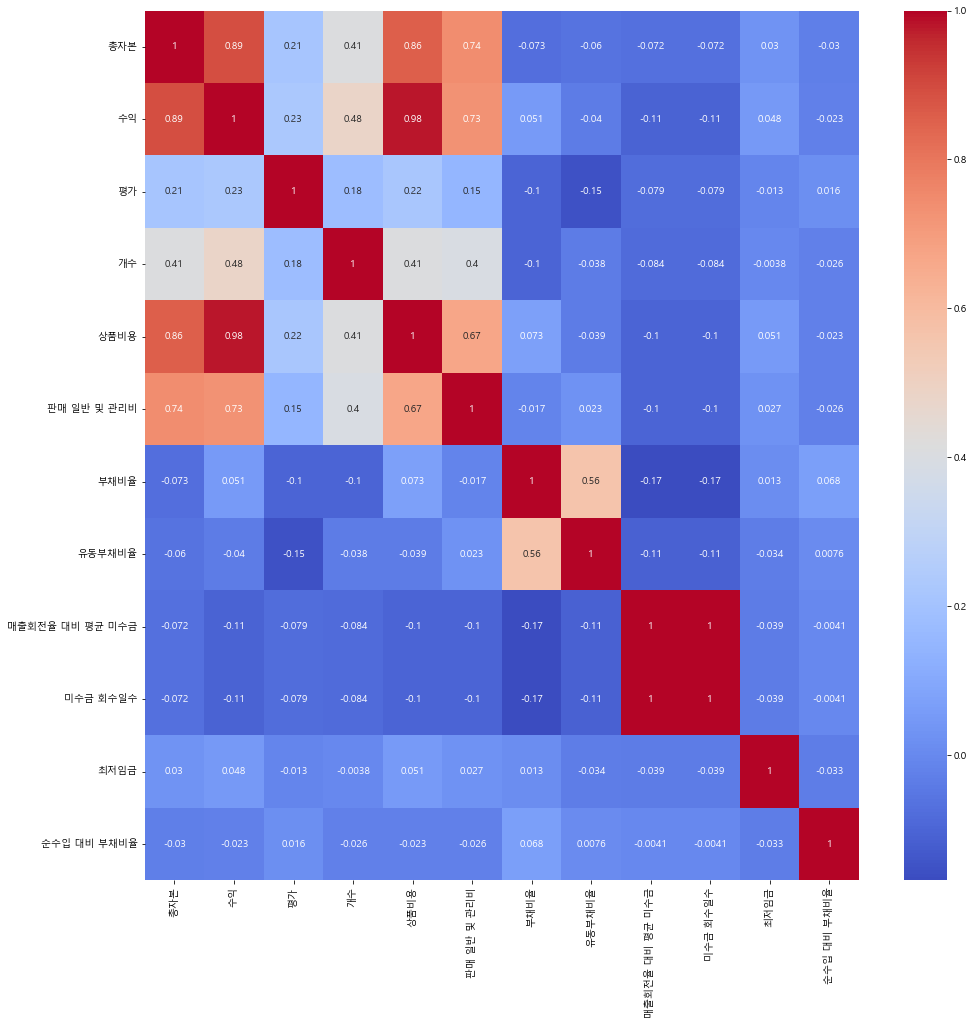

In [181]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(16,16))
sns.heatmap(data_with_rank[relation].corr(),annot=True, cmap="coolwarm")

In [290]:
positive_corr_x_value = positive_corr.columns.tolist()[-1]
positive_corr_y_value = positive_corr.columns.tolist()[:-1]
data_with_rank_sorted = data_with_rank.sort_values("Rank_Value")

In [294]:
def corrbargraph(x_value, y_value):
    
    plt.figure(figsize=(15,8))
    # 컬러랜덤부여
    value = randint(0, len(colors)-1)

    for i in range(1,6):
        plt.subplot(2,3,i)  
        sns.barplot(x = x_value, y = y_value[i-1],
                    data = data_with_rank_sorted,
                    palette = colors[value])

    plt.tight_layout(pad=0.5)

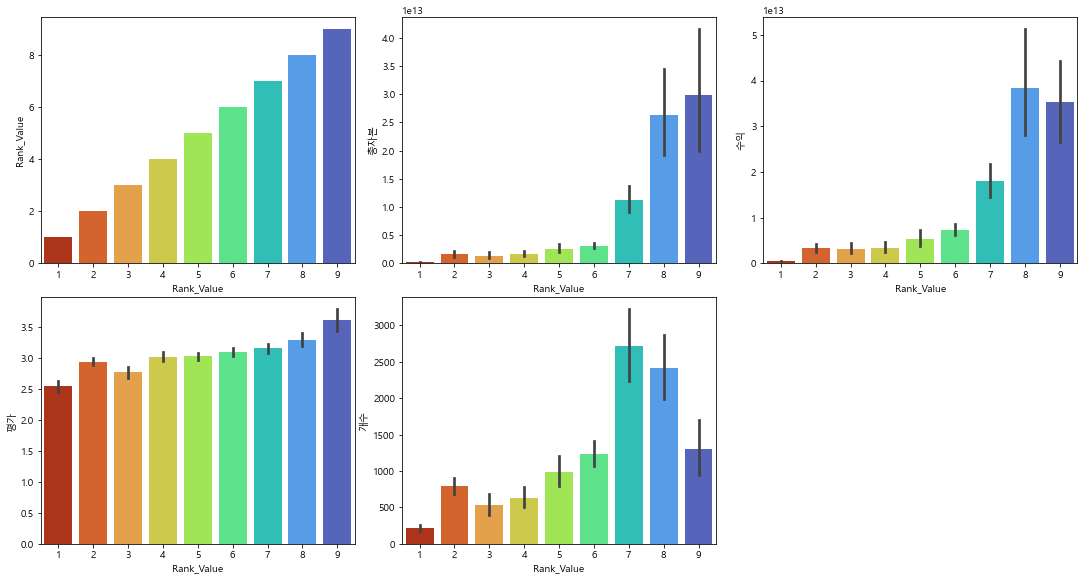

In [295]:
corrbargraph(positive_corr_x_value, positive_corr_y_value)

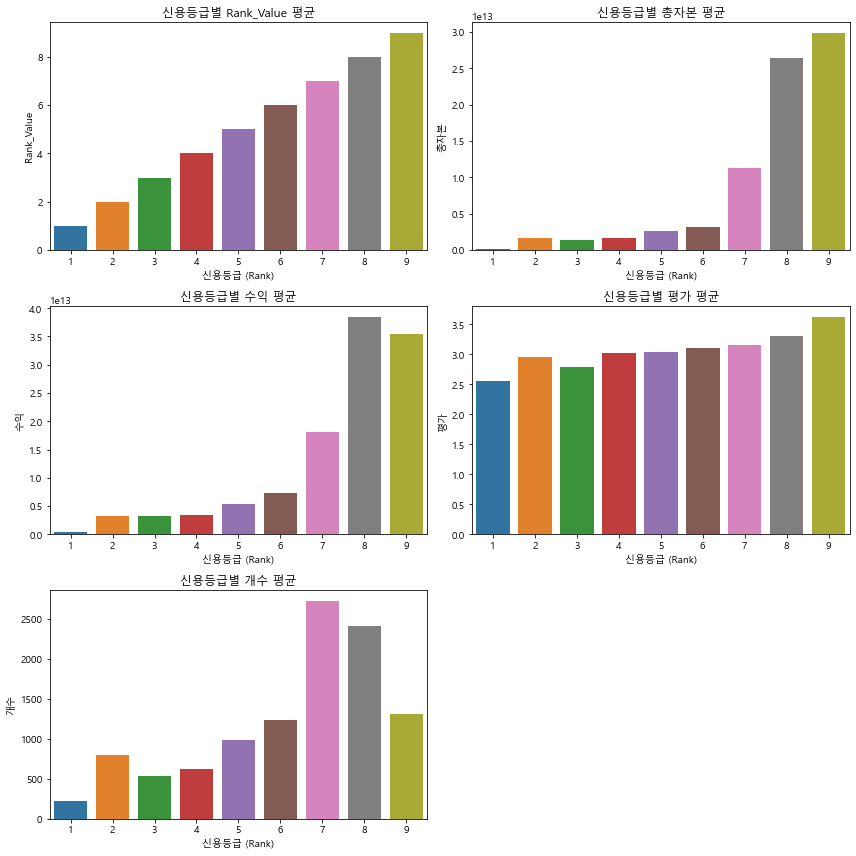

In [279]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 신용등급별 피쳐 값의 평균 계산
mean_features_by_rank = data_with_rank.groupby("Rank_Value")[positive_corr_features.index].mean()


# 그래프 그리기
num_plots = len(positive_corr_features)
num_rows = (num_plots // 2) + (num_plots % 2)

plt.figure(figsize=(12, 12))
for i, feature in enumerate(mean_features_by_rank.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.barplot(x=mean_features_by_rank.index, y=mean_features_by_rank[feature])
    plt.xlabel("신용등급 (Rank)")
    plt.ylabel(feature)
    plt.title(f"신용등급별 {feature} 평균")
    plt.tight_layout()

plt.show()

In [179]:
# 음의 상관계수 결과 출력

print("음의 상관계수 상위 5개:")
print(negative_corr_df)

음의 상관계수 상위 5개:
           Feature  Correlation
0             부채비율    -0.307303
1           유동부채비율    -0.228380
2  매출회전율 대비 평균 미수금    -0.083707
3         미수금 회수일수    -0.083707
4             최저임금    -0.031789


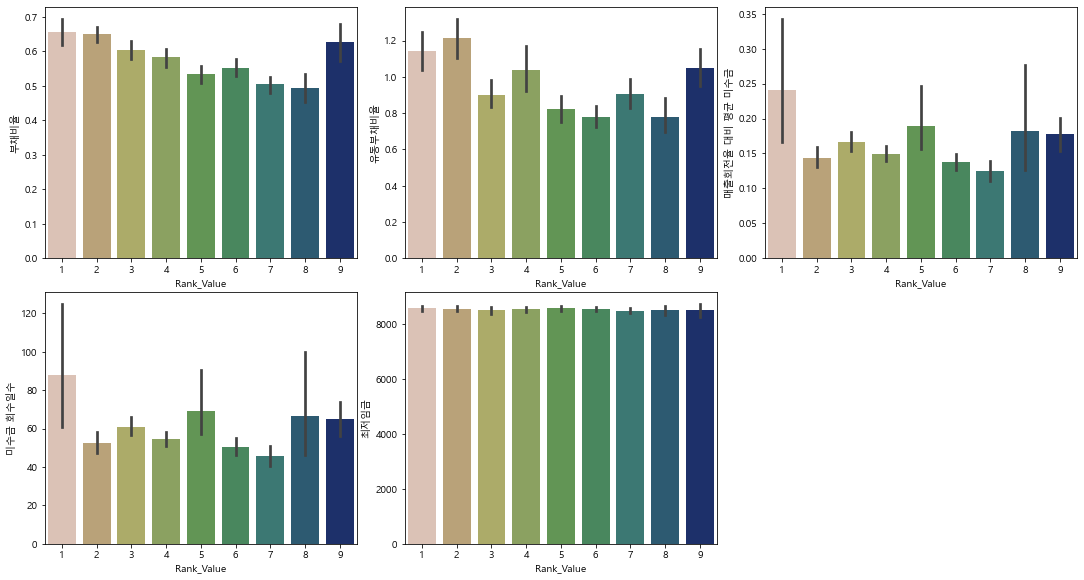

In [296]:
negative_corrx_value = negative_corr.columns.tolist()[-1]
negative_corry_value = negative_corr.columns.tolist()[:-1]

corrbargraph(negative_corrx_value, negative_corry_value)

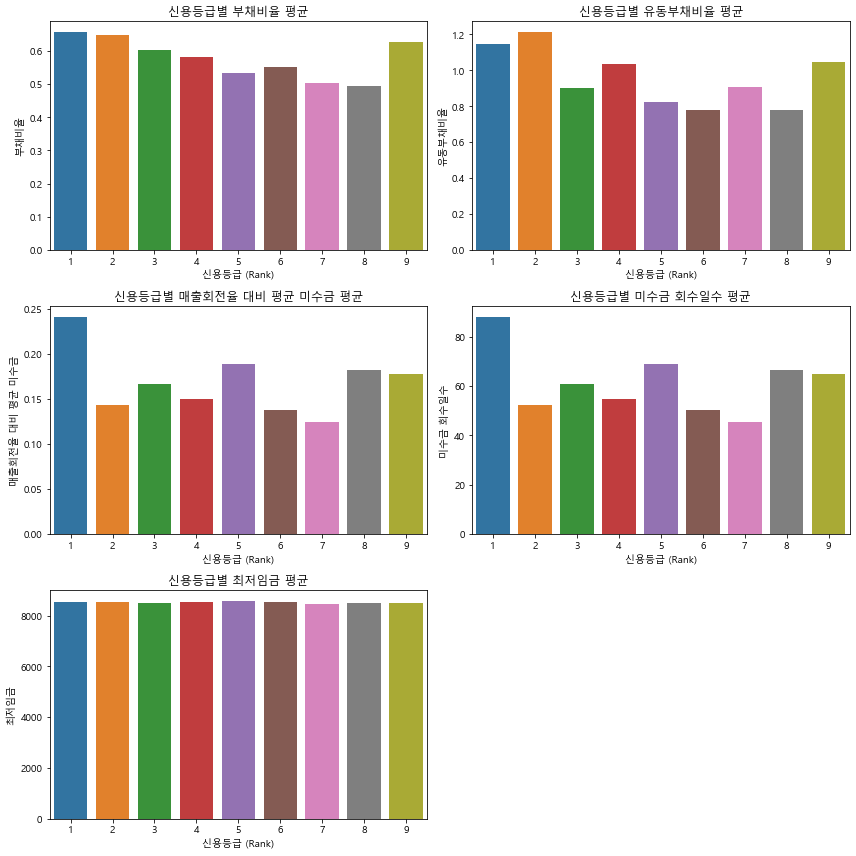

In [293]:
# 신용등급별 피쳐 값의 평균 계산
mean_features_by_rank = data_with_rank.groupby("Rank_Value")[negative_corr_features.index].mean()

# 그래프 그리기
num_plots = len(negative_corr_features)
num_rows = (num_plots // 2) + (num_plots % 2)

plt.figure(figsize=(12, 12))
for i, feature in enumerate(mean_features_by_rank.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.barplot(x=mean_features_by_rank.index, y=mean_features_by_rank[feature])
    plt.xlabel("신용등급 (Rank)")
    plt.ylabel(feature)
    plt.title(f"신용등급별 {feature} 평균")
    plt.tight_layout()

plt.show()


## 피쳐 확인

In [182]:
# columns_to_exclude = ['Rank', 'index', 'Rank_Value']
# data_with_rank_converte = data_without_rank.drop(columns=columns_to_exclude)
df_numeric = data_without_rank.select_dtypes(exclude='object')


In [183]:
# 극단값 제거
num_outliers = 3

# 각 컬럼에서 극단값 위치 확인
outlier_indices = []
for col in df_numeric.columns:
    if np.issubdtype(df_numeric[col].dtype, np.number):
        sorted_col = df_numeric[col].sort_values()
        outlier_indices.extend(sorted_col.index[:num_outliers].tolist())
        outlier_indices.extend(sorted_col.index[-num_outliers:].tolist())

# 중복된 인덱스 제거
outlier_indices = list(set(outlier_indices))

# 극단값이 제거된 데이터프레임 생성
df_outlier_filtered = df_numeric.drop(outlier_indices).reset_index(drop=True)

In [185]:
column_list = ['Ebitda_Margin', 'Ebitda_To_Interest_Expense', 'Debt_Ratio',
               'Dependence_On_Net_Borrowings', 'Net_Borrowings_To_Ebitda',
               'Sales_Revenue', 'Cogs', 'Selling_General_Administrative_Expenses',
               'Ebit', 'Ebit_Margin', 'Ebitda_To_Sales_Revenue', 'Total_Assets', 'Roa',
               'Ebitda', 'Financial_Expenses', 'Corporate_Tax', 'Operating_Cash_Flow',
               'Free_Cash_Flow', 'Total_Liabilities', 'Total_Equity',
               'Total_Borrowings', 'Net_Borrowings', 'Borrowing_Dependency',
               'Total_Borrowings_To_Ebitda', 'Debt_To_Net_Income_Ratio',
               'Total_Assets_Leverage', 'Current_Liabilities', 'Working_Capital',
               'Current_Liabilities_Ratio', 'Quick_Assets', 'Quick_Ratio',
               'Cash_And_Cash_Equivalents', 'Short_Term_Borrowings',
               'Days_Sales_Outstanding',
               'Average_Accounts_Receivable_Per_Sales_Turnover',
               'Market_Capitalization', 'Minimum_Wag', 'Uskor_Exchange_Average',
               'Ppi_Year', 'Kor_Usa_Ir_Diff', 'Kr_Standard_Yield', 'Count', 'Rating',
               'Paywellfare', 'Worklifebal', 'Culture', 'Opportunity', 'Manager',
               'Recommend', 'Ceo', 'Potential', 'Crb_Index_Avg']

translated_column_list = ['Ebitda_Margin', 'Ebitda_이자비용_비율', '부채_비율',
                          '순차입비의_종속성', 'Ebitda_순차입비율',
                          '매출액', '판매원가', '판매_관리_비용',
                          'Ebit', 'Ebit_마진', 'Ebitda_매출액비율', '총자산', 'ROA',
                          'Ebitda', '금융_비용', '법인_세', '영업_현금_흐름',
                          '자유_현금_흐름', '총부채', '총자본',
                          '총차입금', '순차입금', '차입_종속성',
                          '총차입금_대비_Ebitda', '부채_순이익_비율',
                          '총자산_레버리지', '유동_부채', '운전_자본',
                          '유동_부채_비율', '당좌자산', '당좌비율',
                          '현금_및_현금_성자산', '단기_차입금',
                          '매출채권회전일수',
                          '매출채권회전율_평균',
                          '시가_총액', '최저_임금', '미국_한국_환율_평균',
                          '생산자_물가지수_연도별', '한미_금리_차이', '한국_기준_수익률', 'Count', 'Rating',
                          'Paywellfare', 'Worklifebal', 'Culture', 'Opportunity', 'Manager',
                          'Recommend', 'Ceo', 'Potential', 'Crb_Index_Avg']

# 'Count' 이후 컬럼명에 '별점_' 추가
translated_column_list[translated_column_list.index('Count'):] = ['별점_' + column for column in translated_column_list[translated_column_list.index('Count'):]]

In [186]:
# import pandas as pd

# # 컬럼명 변경을 위한 딕셔너리 생성
# column_mapping = dict(zip(column_list, translated_column_list))

# # 컬럼명 변경
# df_outlier_filtered = df_outlier_filtered.rename(columns=column_mapping)


In [191]:
# df_filtered = df_outlier_filtered.rename(columns={'별점_Crb_Index_Avg': 'CRB_지수'})

In [190]:
df_outlier_filtered.columns

Index(['EBITDA 마진', '이자비용 대비 EBITDA', '부채비율', '순차입금 의존도', 'EBITDA 대비 순차입금',
       '수익', '상품비용', '판매 일반 및 관리비', '영업이익', '영업이익 마진', '매출액 대비 EBITDA', '총자산',
       '총자산이익률', 'EBITDA', '금융비용', '법인세', '영업현금흐름', '자유현금흐름', '총부채', '총자본',
       '총차입금', '순차입금', '차입 의존도', 'EBITDA 대비 총차입금', '순수입 대비 부채비율', '총자산 레버리지',
       '유동부채', '운전자본', '유동부채비율', '당좌자산', '당좌비율', '현금 및 현금성자산', '단기차입금',
       '미수금 회수일수', '매출회전율 대비 평균 미수금', '시가총액', '최저임금', '미국/한국 환율 평균',
       '생산자 물가지수 연간', '한미 이자율 차이', '한국 표준 수익률', '개수', '평가', '복지 지급',
       '일과 생활의 균형', '문화', '기회', '매니저', '추천', 'CEO', '잠재력', 'CRB 지수 평균'],
      dtype='object')

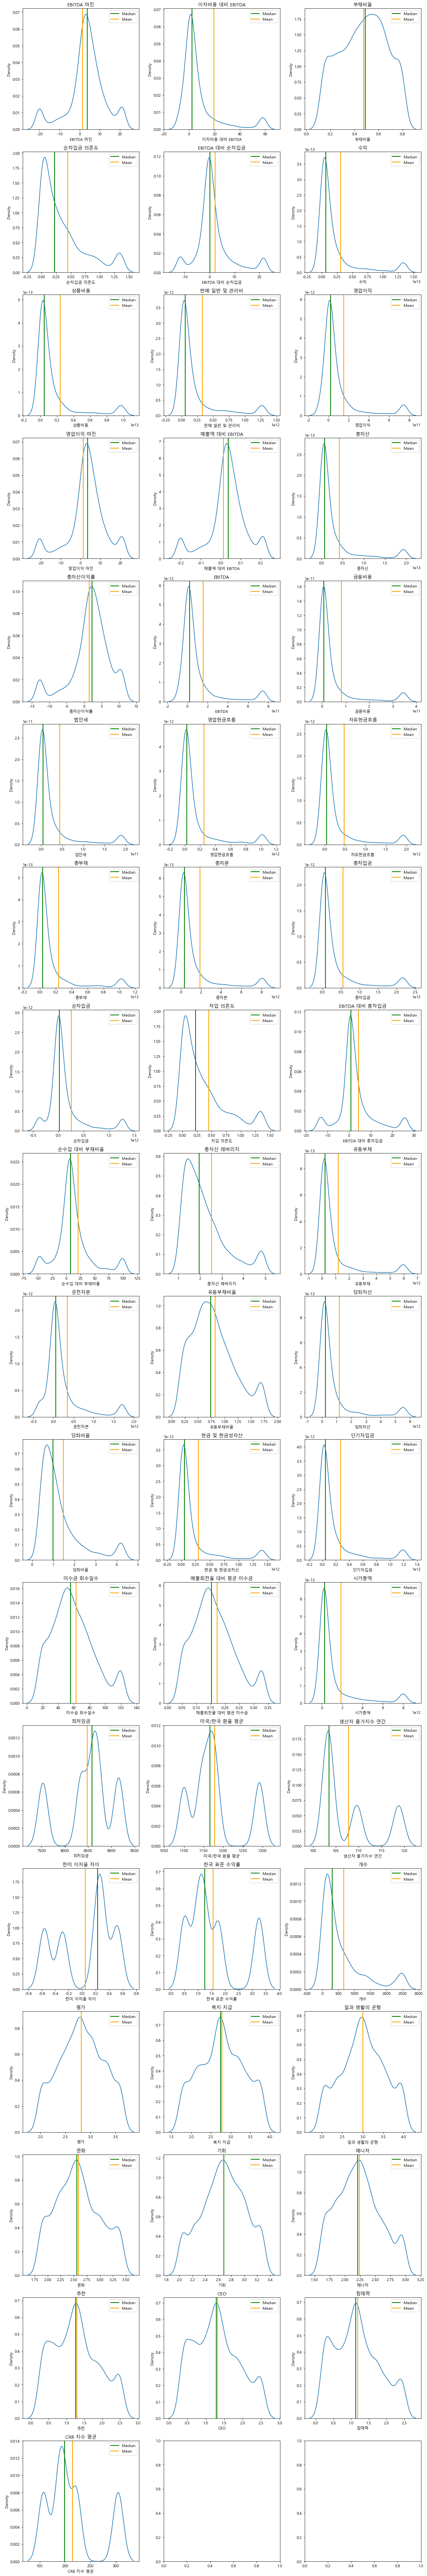

In [307]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 분할할 백분위수 범위 설정
lower_percentile = 5
upper_percentile = 95

# 퍼센타일 범위 내의 데이터 추출
df_temp = df_outlier_filtered.copy()
for column in df_temp.columns:
    lower_threshold = np.percentile(df_outlier_filtered[column], lower_percentile)
    upper_threshold = np.percentile(df_outlier_filtered[column], upper_percentile)
    df_temp[column] = df_outlier_filtered[column].clip(lower_threshold, upper_threshold)

# 분할된 데이터를 사용한 그래프 생성
num_columns = len(df_outlier_filtered.columns)
num_plots_per_line = 3
fig, axes = plt.subplots((num_columns // num_plots_per_line + 1), num_plots_per_line, figsize=(15, 5 * (num_columns // num_plots_per_line + 1)))

for i, column in enumerate(df_outlier_filtered.columns):
    ax = axes[i // num_plots_per_line, i % num_plots_per_line]
    sns.kdeplot(data=df_temp[column], ax=ax)
    # 원본데이터 셋의 mean과 median값 출력 
    ax.axvline(df_outlier_filtered[column].median(), color='green', linestyle='-', linewidth=2, label='Median')
    ax.axvline(df_outlier_filtered[column].mean(), color='orange', linestyle='-', linewidth=2, label='Mean')
    ax.legend()
    ax.set_title(column)

plt.tight_layout()
plt.show()


정크랑 aAa차이
시가총액으로 구간화 해서 차이 보기 신용등급과 양의 상관관계 큰 것
안정성 수익성 등등 각 지표 집계 
전체 규모별로 무엇을 중요하게 평가했는지
시총 있는지 체크

In [313]:
data_with_rank_copy = data_with_rank.drop("Rank",axis=1)

In [319]:
data_with_rank_시각화.columns

Index(['Ebitda 마진', '이자비용 대비 Ebitda', '부채비율', '순차입금 의존도', 'Ebitda 대비 순차입금',
       '수익', '상품비용', '판매 일반 및 관리비', '영업이익', '영업이익 마진', '매출액 대비 Ebitda', '총자산',
       '총자산이익률', 'Ebitda', '금융비용', '법인세', '영업현금흐름', '자유현금흐름', '총부채', '총자본',
       '총차입금', '순차입금', '차입 의존도', 'Ebitda 대비 총차입금', '순수입 대비 부채비율', '총자산 레버리지',
       '유동부채', '운전자본', '유동부채비율', '당좌자산', '당좌비율', '현금 및 현금성자산', '단기차입금',
       '미수금 회수일수', '매출회전율 대비 평균 미수금', '시가총액', '최저임금', '미국/한국 환율 평균',
       '생산자 물가지수 연간', '한미 이자율 차이', '한국 표준 수익률', '개수', '평가', '복지 지급',
       '일과 생활의 균형', '문화', '기회', '매니저', '추천', 'Ceo', '잠재력', 'Crb 지수 평균',
       'Rank_Value'],
      dtype='object')

In [318]:
data_with_rank_시각화 = data_with_rank_copy.drop(["Corp", "Stock_Code", "Sector", "Year"],axis=1)

In [340]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 시가총액을 3등분으로 그룹화하여 'Market_Cap_Group' 컬럼 생성
data_with_rank_시각화['market_cap'] = pd.qcut(data_with_rank_copy['시가총액'], q=3, labels=['하위', '중위', '상위'])

# 각 그룹별로 데이터프레임 분할
grouped_data_group = data_with_rank_시각화.groupby('market_cap')

for group, df_group in grouped_data_group:
    df_group = df_group.drop(['시가총액'], axis=1)
    correlation = df_group.corr().abs()
    
    # Exclude 'Rank_Value' column from correlation matrix
    selected_corr = correlation.drop('Rank_Value')['Rank_Value']
    top_5 = selected_corr.sort_values(ascending=False).head(5)
    bottom_5 = selected_corr.sort_values(ascending=True).head(5)
    
    result_df = pd.DataFrame({'Column': top_5.index, 'Correlation': top_5.values})
    result_df = result_df.append(pd.DataFrame({'Column': bottom_5.index, 'Correlation': bottom_5.values}))
    result_df.reset_index(drop=True, inplace=True)
    
    print(f"Top 5 and Bottom 5 Correlations with '신용등급' in {group} 시가총액 그룹:")
    print(result_df)
    print()


Top 5 and Bottom 5 Correlations with '신용등급' in 하위 시가총액 그룹:
           Column  Correlation
0              문화     0.559073
1             잠재력     0.543898
2   매출액 대비 Ebitda     0.516754
3       Ebitda 마진     0.516754
4              추천     0.514213
5       한국 표준 수익률     0.004171
6  이자비용 대비 Ebitda     0.023017
7  Ebitda 대비 총차입금     0.029911
8  Ebitda 대비 순차입금     0.034442
9       Crb 지수 평균     0.053922

Top 5 and Bottom 5 Correlations with '신용등급' in 중위 시가총액 그룹:
            Column  Correlation
0              총자본     0.496712
1               개수     0.491717
2           영업현금흐름     0.477756
3       현금 및 현금성자산     0.475310
4      판매 일반 및 관리비     0.458953
5      미국/한국 환율 평균     0.033614
6        일과 생활의 균형     0.034268
7        한국 표준 수익률     0.035646
8  매출회전율 대비 평균 미수금     0.051079
9         미수금 회수일수     0.051079

Top 5 and Bottom 5 Correlations with '신용등급' in 상위 시가총액 그룹:
           Column  Correlation
0              평가     0.630243
1             매니저     0.608838
2              문화     0.595083
3   

C:\Users\USER_20211027\AppData\Local\Temp\ipykernel_15516\1368197151.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'Column': bottom_5.index, 'Correlation': bottom_5.values}))
C:\Users\USER_20211027\AppData\Local\Temp\ipykernel_15516\1368197151.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'Column': bottom_5.index, 'Correlation': bottom_5.values}))
C:\Users\USER_20211027\AppData\Local\Temp\ipykernel_15516\1368197151.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'Column': bottom_5.index, 'Correlation': bottom_5.values}))


In [305]:
grouped_data_group

In [ ]:
data_with_rank_시각화.co

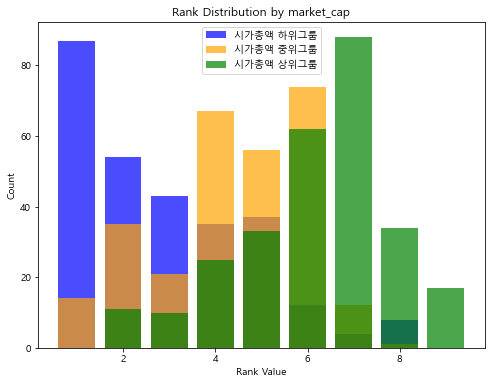

In [339]:
plt.figure(figsize=(8, 6))

# market_cap 0
cluster_0_data = data_with_rank_시각화[data_with_rank_시각화['market_cap'] == '하위']
cluster_0_rank = cluster_0_data['Rank_Value'].value_counts().sort_index()
plt.bar(cluster_0_rank.index, cluster_0_rank.values, alpha=0.7, color='blue', label='시가총액 하위그룹')

# market_cap 1
cluster_1_data = data_with_rank_시각화[data_with_rank_시각화['market_cap'] == '중위']
cluster_1_rank = cluster_1_data['Rank_Value'].value_counts().sort_index()
plt.bar(cluster_1_rank.index, cluster_1_rank.values, alpha=0.7, color='orange', label='시가총액 중위그룹')

# market_cap 2
cluster_2_data = data_with_rank_시각화[data_with_rank_시각화['market_cap'] == '상위']
cluster_2_rank = cluster_2_data['Rank_Value'].value_counts().sort_index()
plt.bar(cluster_2_rank.index, cluster_2_rank.values, alpha=0.7, color='green', label='시가총액 상위그룹')


# 폰트 경로 설정 (본인 환경에 맞게 경로를 수정해주세요)
font_path = 'C:\Windows\Fonts\malgun.ttf'

# 폰트 이름 얻기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# 한글 폰트 설정
rc('font', family=font_name)
plt.title('Rank Distribution by market_cap')
plt.xlabel('Rank Value')
plt.ylabel('Count')
plt.legend()
plt.show()


In [337]:
data_with_rank_copy = data_with_rank.drop("Rank",axis=1)

In [338]:
data_with_rank.columns

Index(['corp', 'stock_code', 'sector', 'year', 'EBITDA 마진', '이자비용 대비 EBITDA',
       '부채비율', '순차입금 의존도', 'EBITDA 대비 순차입금', '수익', '상품비용', '판매 일반 및 관리비',
       '영업이익', '영업이익 마진', '매출액 대비 EBITDA', '총자산', '총자산이익률', 'EBITDA', '금융비용',
       '법인세', '영업현금흐름', '자유현금흐름', '총부채', '총자본', '총차입금', '순차입금', '차입 의존도',
       'EBITDA 대비 총차입금', '순수입 대비 부채비율', '총자산 레버리지', '유동부채', '운전자본', '유동부채비율',
       '당좌자산', '당좌비율', '현금 및 현금성자산', '단기차입금', '미수금 회수일수', '매출회전율 대비 평균 미수금',
       '시가총액', '최저임금', '미국/한국 환율 평균', '생산자 물가지수 연간', '한미 이자율 차이', '한국 표준 수익률',
       'Rank', '개수', '평가', '복지 지급', '일과 생활의 균형', '문화', '기회', '매니저', '추천',
       'CEO', '잠재력', 'CRB 지수 평균', 'Rank_Value'],
      dtype='object')

## 매출액 분위수 아닌 클러스터로 구해보기
<br>
기업이 속한 산업별로 매출액을 기준으로 그룹화 하되
<br>
매출액을 중심으로 군집화 하여 단순히 순서를 세워서 3등분 하기보다  우리나라에 유의미하게 나뉘는 구간으로 적용

### 전체 데이터셋에 대한 매출액 클러스터

In [343]:
from sklearn.cluster import KMeans

# 클러스터링을 위한 데이터 선택
cluster_data = data_with_rank_copy[['수익']]

# 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(cluster_data)

# 클러스터링 결과를 데이터프레임에 추가
data_with_rank_copy['Cluster'] = cluster_labels

# 각 클러스터별로 그룹화
grouped_clusters = data_with_rank_copy.groupby('Cluster')

# 클러스터별 수익 평균 계산
avg_sales = data_with_rank_copy.groupby('Cluster')['수익'].mean()
cluster_names = ['하위', '중위', '상위']
avg_sales.index = cluster_names

for cluster, df_cluster in grouped_clusters:
    df_cluster = df_cluster.drop(['corp', '수익', 'Cluster'], axis=1)
    correlation = df_cluster.corr().abs()
    selected_corr = correlation['Rank_Value'].drop('Rank_Value')
    top_5 = selected_corr.sort_values(ascending=False).head(5)
    bottom_5 = selected_corr.sort_values(ascending=True).head(5)
    result_df = pd.DataFrame({'Column': top_5.index, 'Correlation': top_5.values})
    result_df = result_df.append(pd.DataFrame({'Column': bottom_5.index, 'Correlation': bottom_5.values}))
    result_df.reset_index(drop=True, inplace=True)
    cluster_label = f"Cluster {cluster} (수익 평균: {avg_sales[cluster]})"
    print(cluster_label)
    print(f"Top 5 and Bottom 5 Correlations with '신용등급' in {cluster_label}:")
    print(result_df)
    print()

Cluster 0 (수익 평균: 2816119332468.71)
Top 5 and Bottom 5 Correlations with '신용등급' in Cluster 0 (수익 평균: 2816119332468.71):
        Column  Correlation
0          총자본     0.476942
1           개수     0.391708
2           평가     0.389024
3          잠재력     0.372780
4           추천     0.366927
5    CRB 지수 평균     0.006332
6         당좌비율     0.014278
7    한국 표준 수익률     0.014997
8  순수입 대비 부채비율     0.015249
9  생산자 물가지수 연간     0.016740

Cluster 1 (수익 평균: 23850210524320.027)
Top 5 and Bottom 5 Correlations with '신용등급' in Cluster 1 (수익 평균: 23850210524320.027):
           Column  Correlation
0             CEO     0.452871
1             잠재력     0.426554
2              추천     0.417809
3  이자비용 대비 EBITDA     0.386195
4            부채비율     0.379748
5      현금 및 현금성자산     0.008419
6          차입 의존도     0.009410
7        순차입금 의존도     0.009410
8           단기차입금     0.009670
9     판매 일반 및 관리비     0.019844

Cluster 2 (수익 평균: 73043371356647.55)
Top 5 and Bottom 5 Correlations with '신용등급' in Cluster 2 (수익 평균: 730

C:\Users\USER_20211027\AppData\Local\Temp\ipykernel_15516\516890194.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'Column': bottom_5.index, 'Correlation': bottom_5.values}))
C:\Users\USER_20211027\AppData\Local\Temp\ipykernel_15516\516890194.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'Column': bottom_5.index, 'Correlation': bottom_5.values}))
C:\Users\USER_20211027\AppData\Local\Temp\ipykernel_15516\516890194.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'Column': bottom_5.index, 'Correlation': bottom_5.values}))


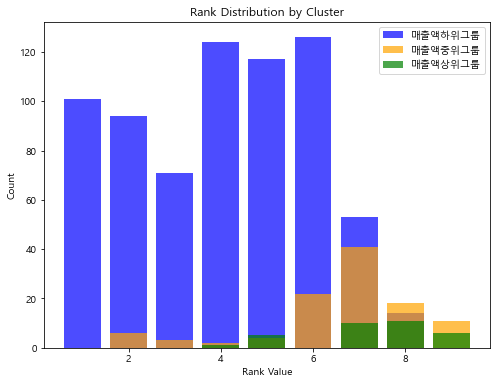

In [344]:
plt.figure(figsize=(8, 6))

# Cluster 0
cluster_0_data = data_with_rank_copy[data_with_rank_copy['Cluster'] == 0]
cluster_0_rank = cluster_0_data['Rank_Value'].value_counts().sort_index()
plt.bar(cluster_0_rank.index, cluster_0_rank.values, alpha=0.7, color='blue', label='매출액 하위그룹')

# Cluster 1
cluster_1_data = data_with_rank_copy[data_with_rank_copy['Cluster'] == 1]
cluster_1_rank = cluster_1_data['Rank_Value'].value_counts().sort_index()
plt.bar(cluster_1_rank.index, cluster_1_rank.values, alpha=0.7, color='orange', label='매출액 중위그룹')

# Cluster 2
cluster_2_data = data_with_rank_copy[data_with_rank_copy['Cluster'] == 2]
cluster_2_rank = cluster_2_data['Rank_Value'].value_counts().sort_index()
plt.bar(cluster_2_rank.index, cluster_2_rank.values, alpha=0.7, color='green', label='매출액 상위그룹')

# 폰트 경로 설정 (본인 환경에 맞게 경로를 수정해주세요)
font_path = 'C:\Windows\Fonts\malgun.ttf'

# 폰트 이름 얻기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# 한글 폰트 설정
rc('font', family=font_name)
plt.title('Rank Distribution by Cluster')
plt.xlabel('Rank Value')
plt.ylabel('Count')
plt.legend()
plt.show()


In [312]:
industry_counts = data_with_rank['Sector'].value_counts()
print(industry_counts)

화학             131
유통업             88
기타금융            73
운수장비            72
전기전자            71
서비스업            70
음식료품            63
의약품             43
철강금속            37
기계              36
운수창고업           32
건설업             28
전기가스업           20
종이목재            19
섬유의복            18
비금속광물           17
통신업             15
농업, 임업 및 어업      5
기타제조업            2
Name: Sector, dtype: int64


In [347]:
import pandas as pd

# 산업분류에 해당하는 유니크한 값 조회
industry_categories = data_with_rank_copy['sector'].unique()

# 산업분류별로 데이터프레임을 저장할 리스트 초기화
group_dfs = []


 # 산업분류에 해당하는 데이터 선택
for category in industry_categories:
    category_data = data_with_rank_copy[data_with_rank_copy['sector'] == category]
    # 백분위수로 나누기 
    quantiles = category_data['수익'].quantile([0, 0.33, 0.66, 1])
    category_data['Revenue_Group'] = pd.cut(category_data['수익'], bins=quantiles, labels=['하위', '중위', '상위'], include_lowest=True)

    # 수익 규모별로 group화
    grouped_data = category_data.groupby('Revenue_Group')

    for group, df_group in grouped_data:
        df_group = df_group.drop(['기업명', '주식코드', '산업분류', '년도'], axis=1)
        correlation = df_group.corrwith(df_group['Rank_Value']).abs().sort_values(ascending=False)
        top_5 = correlation[correlation.index != 'Rank_Value'].head(5)
        
        # 그룹별 수익 평균 계싼
        mean_revenue = df_group['수익'].mean()
        result_df = pd.DataFrame({'산업분류': category, '수익 구분': group, '수익 평균': mean_revenue,
                                  '피쳐': top_5.index, '순위': range(1, 6), '상관계수': top_5.values})

        group_dfs.append(result_df)

# 결과 데이터프레임 생성
result_df = pd.concat(group_dfs, ignore_index=True)

print(result_df)


C:\Users\USER_20211027\AppData\Local\Temp\ipykernel_15516\3500377371.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['Revenue_Group'] = pd.cut(category_data['수익'], bins=quantiles, labels=['하위', '중위', '상위'], include_lowest=True)


KeyError: "['기업명', '주식코드', '산업분류', '년도'] not found in axis"

In [447]:
result_df

,산업분류,매출액 구분,매출액 평균,피쳐,순위,상관계수
0,서비스업,하위,7.943566e+11,금융비용,1,0.866120
1,서비스업,하위,7.943566e+11,총자산,2,0.711013
2,서비스업,하위,7.943566e+11,총부채,3,0.689884
3,서비스업,하위,7.943566e+11,유동부채,4,0.647146
4,서비스업,하위,7.943566e+11,총자산레버리지,5,0.604471
5,서비스업,중위,1.395726e+12,당좌비율,1,0.588177
6,서비스업,중위,1.395726e+12,유동부채비율,2,0.566714
7,서비스업,중위,1.395726e+12,별점_문화,3,0.520616
8,서비스업,중위,1.395726e+12,당좌자산,4,0.494691
9,서비스업,중위,1.395726e+12,부채비율,5,0.488892


In [437]:
from sklearn.cluster import KMeans

# 산업분류별로 매출액을 기준으로 클러스터링을 수행할 데이터 선택
cluster_data = data_with_rank_copy[['산업분류', '매출액']]

# 산업분류에 해당하는 유니크한 값 조회
industry_categories = cluster_data['산업분류'].unique()

# 산업분류별로 데이터프레임을 저장할 리스트 초기화
cluster_dfs = []

for category in industry_categories:
    # 산업분류에 해당하는 데이터 선택
    category_data = data_with_rank_copy[data_with_rank_copy['산업분류'] == category]

# 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(category_data['매출액'].values.reshape(-1, 1))

# 클러스터링 결과를 데이터프레임에 추가
category_data['Cluster'] = cluster_labels

# 클러스터별 매출액 평균 계산
avg_sales = category_data.groupby('Cluster')['매출액'].mean()

# 클러스터별로 매출액을 하위, 중위, 상위로 매핑
category_data['매출액 클러스터'] = category_data['매출액'].apply(lambda x: '하위' if x <= avg_sales[0] else ('중위' if x <= avg_sales[1] else '상위'))

# 각 클러스터별로 그룹화
grouped_clusters = category_data.groupby('Cluster')

for cluster, df_cluster in grouped_clusters:
    df_cluster = df_cluster.drop(['기업명', '주식코드', '산업분류', '년도'], axis=1)
    correlation = df_cluster.corrwith(df_cluster['Rank_Value']).abs().sort_values(ascending=False)
    top_5 = correlation[correlation.index != 'Rank_Value'].head(5)
    result_df = pd.DataFrame({'산업분류': category, '매출액 클러스터': df_cluster['매출액 클러스터'].unique()[0], '피쳐': top_5.index, '순위': range(1, 6), '상관계수': top_5.values})
    
    cluster_dfs.append(result_df)
    
# 결과 데이터프레임 생성
result_df = pd.concat(cluster_dfs, ignore_index=True)

print(result_df)

     산업분류 매출액 클러스터           피쳐  순위      상관계수
0   비금속광물       하위         시가총액   1  0.836066
1   비금속광물       하위       영업현금흐름   2  0.814638
2   비금속광물       하위         EBIT   3  0.762848
3   비금속광물       하위       EBITDA   4  0.762848
4   비금속광물       하위          법인세   5  0.730239
5   비금속광물       하위        별점_추천   1  1.000000
6   비금속광물       하위        별점_갯수   2  1.000000
7   비금속광물       하위        별점_평균   3  1.000000
8   비금속광물       하위  별점_워크라이프밸런스   4  1.000000
9   비금속광물       하위        별점_문화   5  1.000000
10  비금속광물       하위     EBITDA마진   1  1.000000
11  비금속광물       하위          법인세   2  1.000000
12  비금속광물       하위     매출채권회전일수   3  1.000000
13  비금속광물       하위        단기차입금   4  1.000000
14  비금속광물       하위         당좌자산   5  1.000000


C:\Users\USER_20211027\AppData\Local\Temp\ipykernel_16472\342793009.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['Cluster'] = cluster_labels
C:\Users\USER_20211027\AppData\Local\Temp\ipykernel_16472\342793009.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['매출액 클러스터'] = category_data['매출액'].apply(lambda x: '하위' if x <= avg_sales[0] else ('중위' if x <= avg_sales[1] else '상위'))


In [438]:
result_df

,산업분류,매출액 클러스터,피쳐,순위,상관계수
0,비금속광물,하위,시가총액,1,0.836066
1,비금속광물,하위,영업현금흐름,2,0.814638
2,비금속광물,하위,EBIT,3,0.762848
3,비금속광물,하위,EBITDA,4,0.762848
4,비금속광물,하위,법인세,5,0.730239
5,비금속광물,하위,별점_추천,1,1.000000
6,비금속광물,하위,별점_갯수,2,1.000000
7,비금속광물,하위,별점_평균,3,1.000000
8,비금속광물,하위,별점_워크라이프밸런스,4,1.000000
9,비금속광물,하위,별점_문화,5,1.000000


In [432]:
data_with_rank_copy.loc[data_with_rank_copy['산업분류'] == '기타제조업', '산업분류'] = '섬유의복'

In [427]:
data_with_rank_copy = data_with_rank.drop("Rank",axis=1)
data_with_rank_copy = data_with_rank_copy.rename(columns=column_mapping)

In [423]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print(result_df)

            산업분류  매출액 클러스터            피쳐  순위      상관계수
0           서비스업         0         별점_문화   1  0.526983
1           서비스업         0         별점_갯수   2  0.506352
2           서비스업         0          부채비율   3  0.452373
3           서비스업         0         별점_평균   4  0.437455
4           서비스업         0          당좌비율   5  0.423186
5           서비스업         1        별점_잠재력   1  1.000000
6           서비스업         1         별점_추천   2  1.000000
7           서비스업         1         별점_기회   3  1.000000
8           서비스업         1         별점_문화   4  1.000000
9           서비스업         1   별점_워크라이프밸런스   5  1.000000
10          기타금융         0       총자산레버리지   1  0.595160
11          기타금융         0          부채비율   2  0.521664
12          기타금융         0          시가총액   3  0.507937
13          기타금융         0        별점_매니저   4  0.476364
14          기타금융         0         차입종속성   5  0.462252
15          기타금융         1        별점_매니저   1  1.000000
16          기타금융         1         별점_평균   2  1.000000
17        

In [400]:
data_with_rank_copy.drop("Cluster", axis=1, inplace=True)